In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np




In [2]:
p = np.array([(0,0),(50,50),(50,100),(150,255),(150,150),(255,255)])
line_1 = np.linspace(p[0,1] ,p[1,1],p[1,0]+1-0).astype('uint8')
line_2 = np.linspace(p[1,1] ,p[2,1],p[2,0]-p[1,0]).astype('uint8')
line_3 = np.linspace(p[2,1]+1 ,p[3,1],p[3,0]-p[2,0]).astype('uint8')
line_4 = np.linspace(p[3,1]+1 ,p[4,1],p[4,0]-p[3,0]).astype('uint8')
line_5 = np.linspace(p[4,1]+1 ,p[5,1],p[5,0]-p[4,0]).astype('uint8')

transform = np.concatenate((line_1,line_2,line_3,line_4,line_5), axis=0).astype('uint8')

img = cv.imread('a1images/emma.jpg',cv.IMREAD_GRAYSCALE)
img_transform = cv.LUT(img, transform)





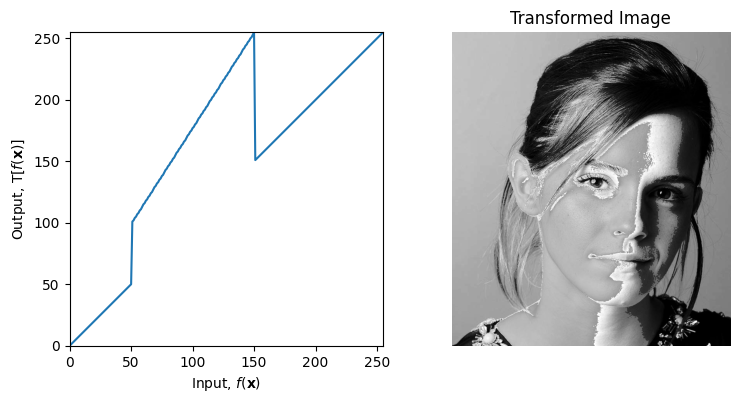

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.plot(transform)
ax1.set_xlabel(r'Input, $f(\mathbf{x})$')
ax1.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax1.set_xlim(0, 255)
ax1.set_ylim(0, 255)
ax1.set_aspect('equal')


ax2.imshow(img_transform, cmap='gray')
ax2.axis('off')  
ax2.set_title('Transformed Image')

plt.tight_layout()
plt.show()


plt.show()

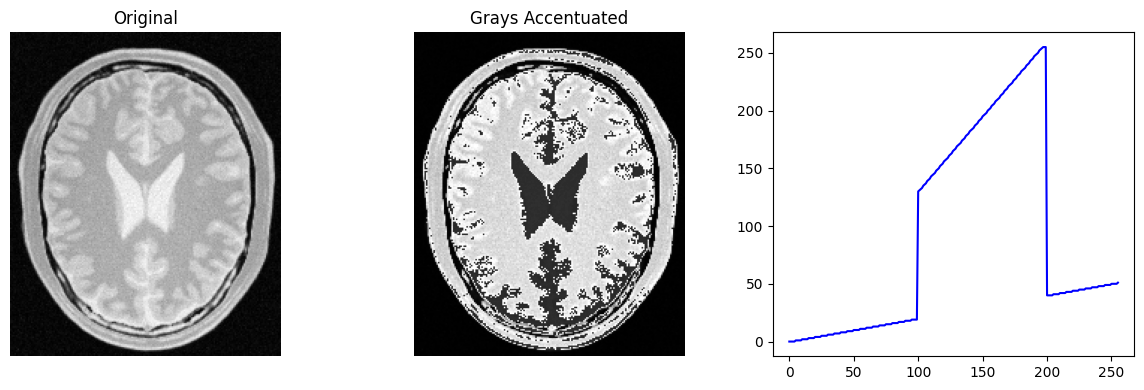

In [ ]:

img = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# Transformation table
#Accentuate Grays
transform_gray = np.zeros(256, dtype=np.uint8)
for p in range(256):
    if p < 100:       
        transform_gray[p] = p*0.2
    elif p < 200:    
        transform_gray[p] = min(255, int(p * 1.3))
    else:            
        transform_gray[p] = p*0.2

# Accentuate Whites
transform_white = np.zeros(256, dtype=np.uint8)
for p in range(256):
    if p < 100:      
        transform_white[p] = p*0.3
    elif p < 200:     
        transform_white[p] = p*0.3
    else:             
        transform_white[p] = min(255, int(p))


img_transform = cv.LUT(img, transform_gray)
img_transform = cv.LUT(img, transform_white)

plt.figure(figsize=(12,4))

# Display using matplotlib
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_transform, cmap='gray')
plt.title("Grays Accentuated")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.plot(range(256), transform_gray, color='blue')
plt.tight_layout()
plt.show()


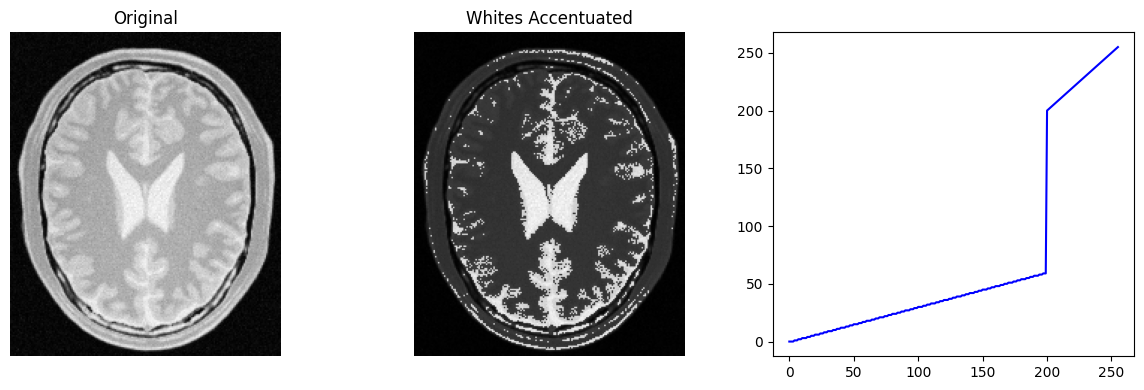

In [17]:
img_transform = cv.LUT(img, transform_white)
plt.figure(figsize=(12,4))

# Display using matplotlib
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_transform, cmap='gray')
plt.title("Whites Accentuated")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.plot(range(256), transform_white, color='blue')
plt.tight_layout()
plt.show()


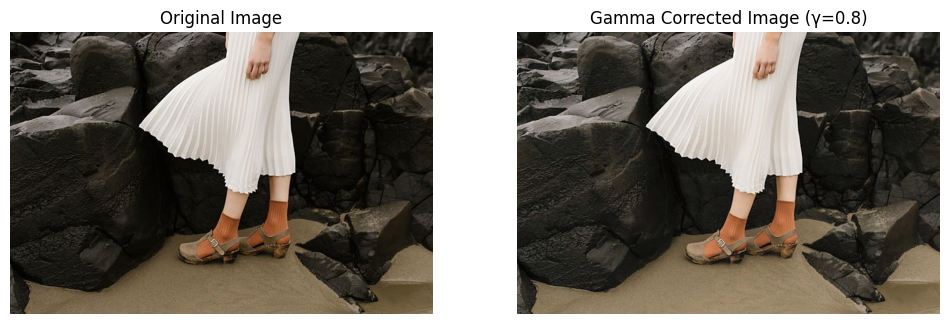

In [ ]:



img = cv.imread('a1images/highlights_and_shadows.jpg')  
# Convert BGR to LAB
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab)
L_normalized = L / 255.0
gamma = 0.8
L_gamma_corrected = np.power(L_normalized, gamma)
L_corrected = np.uint8(L_gamma_corrected * 255)
# Merge 
lab_corrected = cv.merge((L_corrected, a, b))
img_corrected = cv.cvtColor(lab_corrected, cv.COLOR_LAB2BGR)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_corrected, cv.COLOR_BGR2RGB))
plt.title(f"Gamma Corrected Image (γ={gamma})")
plt.axis('off')

plt.show()


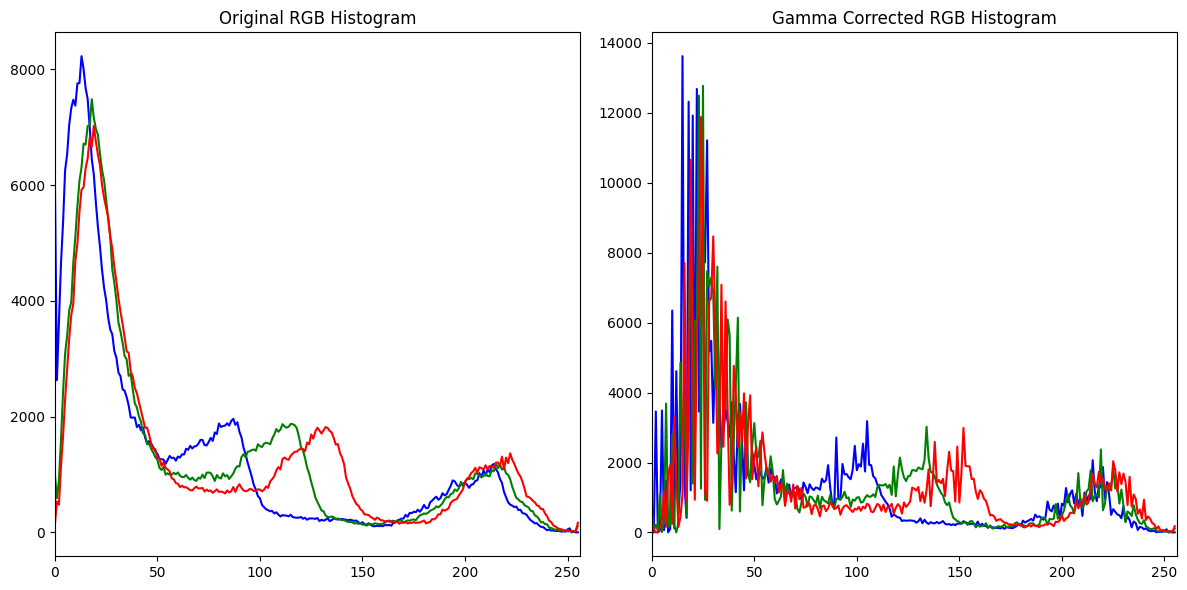

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title("Original RGB Histogram")

plt.subplot(1, 2, 2)
for i, col in enumerate(colors):
    hist = cv.calcHist([img_corrected], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title("Gamma Corrected RGB Histogram")

plt.tight_layout()
plt.show()
plt.show()

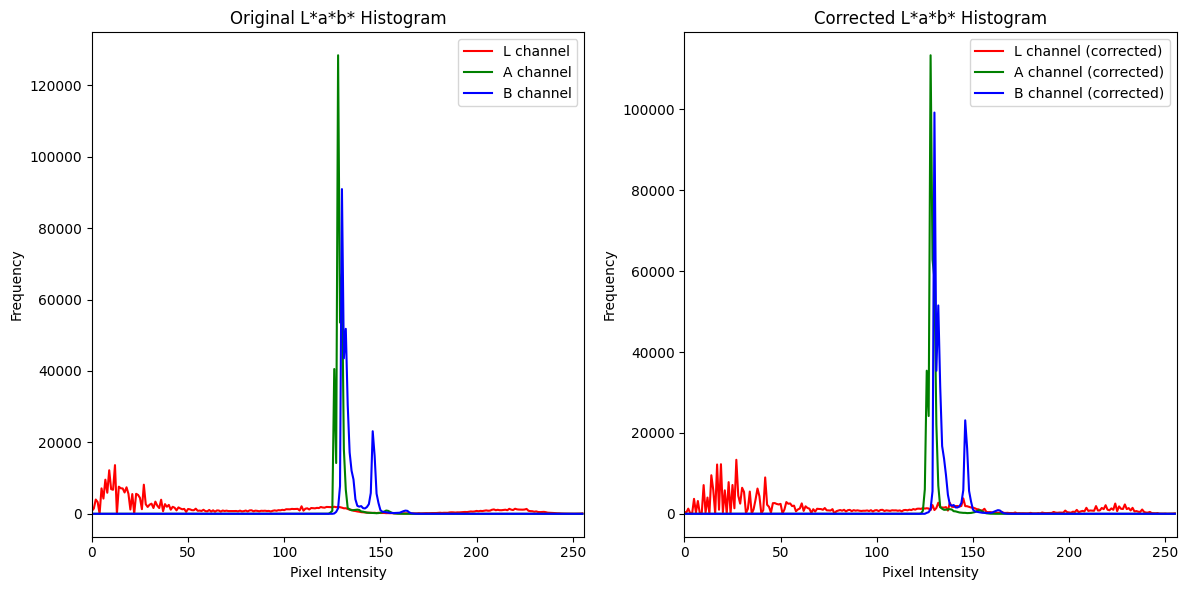

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

# Convert 
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
lab_corrected = cv.cvtColor(img_corrected, cv.COLOR_BGR2LAB)

channels = ('L', 'A', 'B')
colors = ('r', 'g', 'b')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i, col in enumerate(colors):
    hist = cv.calcHist([lab], [i], None, [256], [0, 256])
    plt.plot(hist, color=col, label=f'{channels[i]} channel')
plt.xlim([0, 256])
plt.title('Original L*a*b* Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

# Corrected image histogram
plt.subplot(1, 2, 2)
for i, col in enumerate(colors):
    hist_corrected = cv.calcHist([lab_corrected], [i], None, [256], [0, 256])
    plt.plot(hist_corrected, color=col, label=f'{channels[i]} channel (corrected)')
plt.xlim([0, 256])
plt.title('Corrected L*a*b* Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


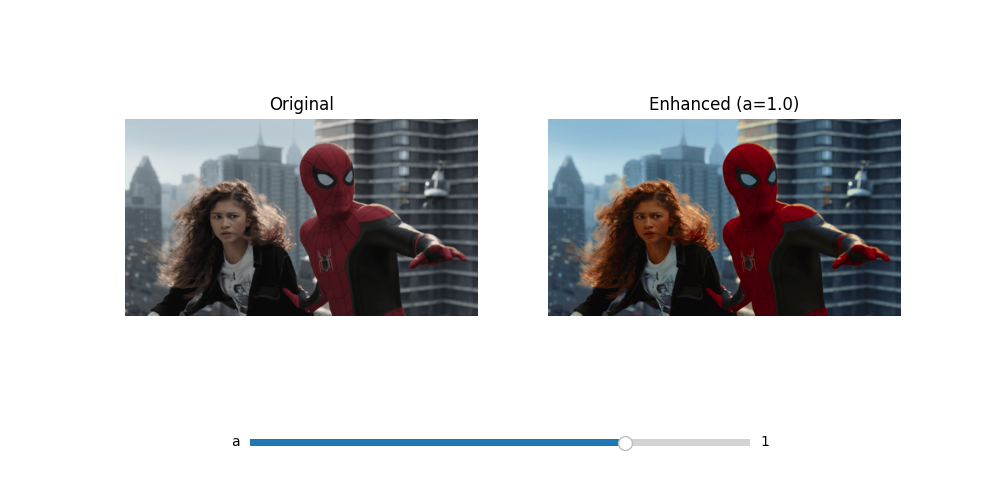

In [ ]:
%matplotlib widget

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider


img_4 = cv.imread('a1images/spider.png')
img_hsv = cv.cvtColor(img_4, cv.COLOR_BGR2HSV)
h, s, v = cv.split(img_hsv)

# Transformation function
def transform(x, a, s=70):
    return np.clip(x + a*128*np.exp(-((x-128)**2) / (2*s**2)), 0, 255)


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(bottom=0.25)


init_a = 1.0
s_transformed = transform(s.astype(np.float32), init_a).astype(np.uint8)
img_vibrance = cv.cvtColor(cv.merge([h, s_transformed, v]), cv.COLOR_HSV2RGB)


ax[0].imshow(cv.cvtColor(img_4, cv.COLOR_BGR2RGB))
ax[0].set_title("Original")
ax[0].axis("off")

im_vibrance = ax[1].imshow(img_vibrance)
ax[1].set_title(f"Enhanced (a={init_a})")
ax[1].axis("off")


ax_a = plt.axes([0.25, 0.1, 0.5, 0.03])
slider_a = Slider(ax_a, 'a', -2.0, 2.0, valinit=init_a, valstep=0.1)


def update(val):
    a = slider_a.val
    s_trans = transform(s.astype(np.float32), a).astype(np.uint8)
    img_vib = cv.cvtColor(cv.merge([h, s_trans, v]), cv.COLOR_HSV2RGB)
    im_vibrance.set_data(img_vib)
    ax[1].set_title(f"Enhanced (a={a:.1f})")
    fig.canvas.draw_idle()

slider_a.on_changed(update)

plt.show()


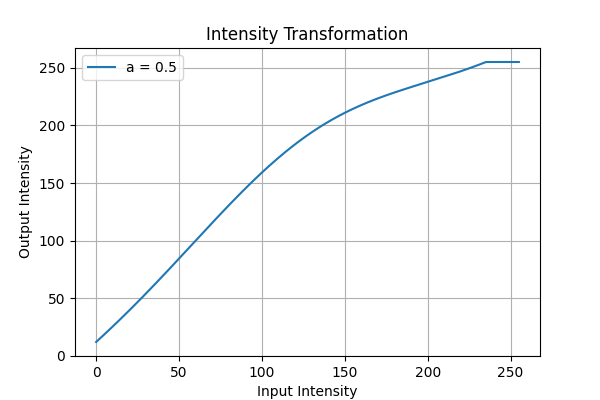

In [32]:
a=0.5
x_vals = np.arange(256)
y_vals = transform(x_vals, a)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, label=f"a = {a}")
plt.title("Intensity Transformation")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.legend()
plt.show()

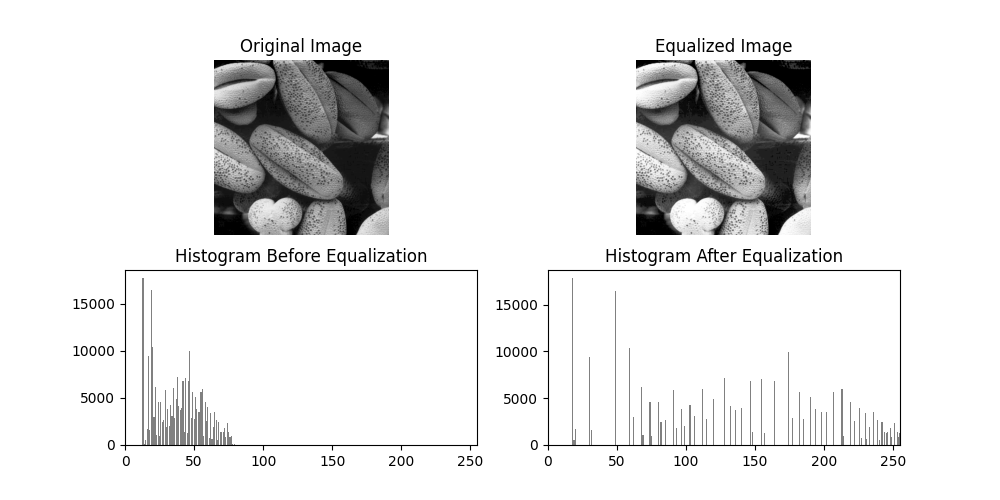

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # for image reading

def histogram_equalization(img):
    #Compute histogram
    hist, bins = np.histogram(img.flatten(), bins=256, range=[0,256])
    #Compute probability distribution
    pdf = hist / hist.sum()
    # Compute CDF
    cdf = np.cumsum(pdf)
    # Normalize 
    cdf_normalized = np.round(cdf * 255).astype(np.uint8)
    img_equalized = cdf_normalized[img]
    return img_equalized, hist

img = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
equalized_img, original_hist = histogram_equalization(img)
equalized_hist, _ = np.histogram(equalized_img.flatten(), bins=256, range=[0,256])

# Plot results
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Equalized Image')
plt.imshow(equalized_img, cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Histogram Before Equalization')
plt.bar(range(256), original_hist, color='gray')
plt.xlim([0,255])

plt.subplot(2,2,4)
plt.title('Histogram After Equalization')
plt.bar(range(256), equalized_hist, color='gray')
plt.xlim([0,255])


plt.show()


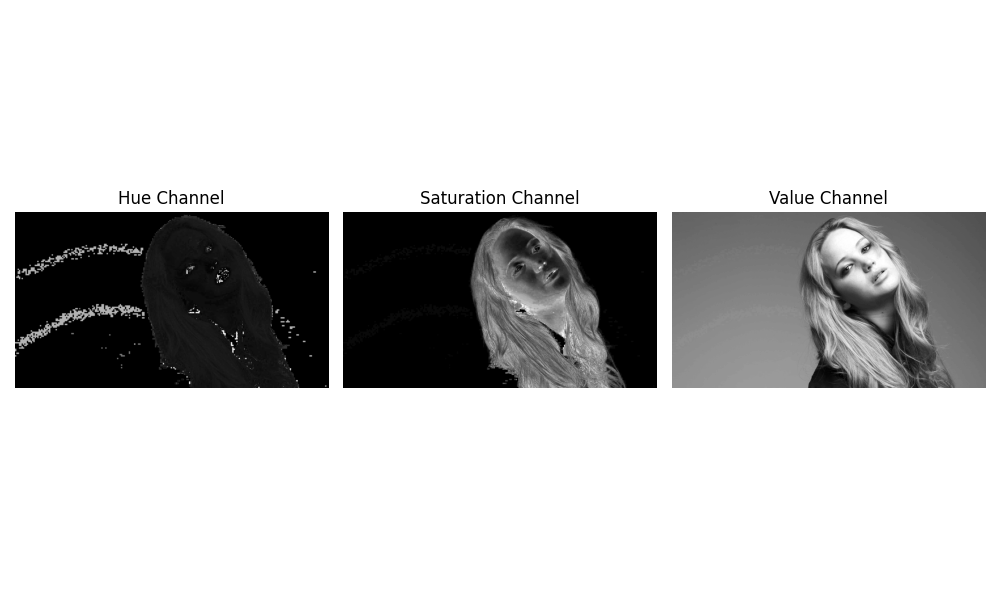

In [44]:
img_6 = cv.imread('a1images/jeniffer.jpg', cv.IMREAD_COLOR)
img_hsv = cv.cvtColor(img_6,cv.COLOR_BGR2HSV)
h,s,v = cv.split(img_hsv)

plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.title('Hue Channel')
plt.imshow(h, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Saturation Channel')
plt.imshow(s, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Value Channel')
plt.imshow(v, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


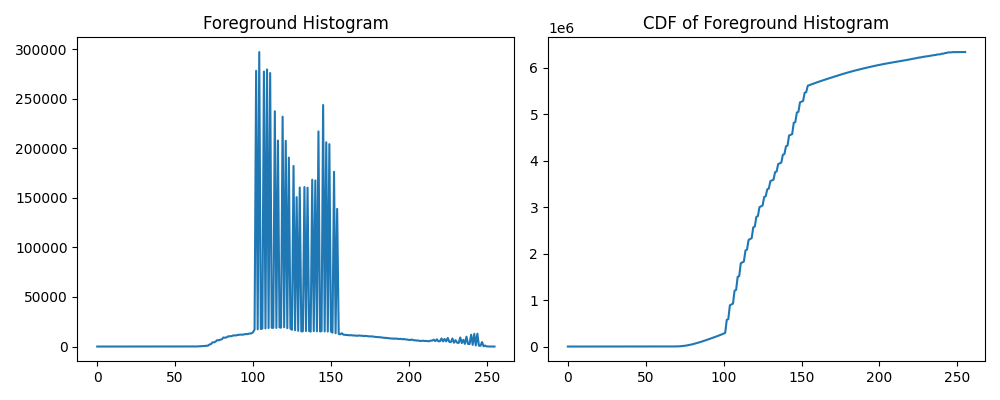

In [ ]:
plt.close()

# Apply binary threshold
_, fg_mask = cv2.threshold(v, 100, 255, cv2.THRESH_BINARY)
# Extract foreground from original image using mask
foreground = cv2.bitwise_and(img_6, img_6, mask=fg_mask)
# Convert foreground to grayscale for histogram calculation
foreground_gray = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)
# Compute histogram of the foreground image
hist_fg = cv2.calcHist([foreground_gray], [0], fg_mask, [256], [0, 256])
cdf = np.cumsum(hist_fg)

# Plot CDF and histogram side by side
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
plt.plot(cdf)
plt.title('CDF of Foreground Histogram')

plt.subplot(1, 2, 1)
plt.plot(hist_fg)
plt.title('Foreground Histogram')

plt.tight_layout()
plt.show()


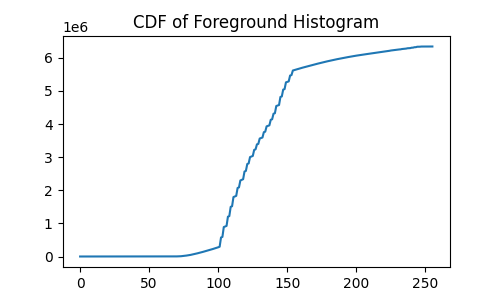

In [45]:
plt.close()

cdf = np.cumsum(hist_fg)
plt.figure(figsize=(5, 3))
plt.plot(cdf)
plt.title('CDF of Foreground Histogram')
plt.show()


In [46]:



t = np.array([(L - 1) / (M * N) * cdf[k] for k in range(256)], dtype=np.uint8)

# Copy original grayscale image
g = f.copy()

# Apply equalization only to the foreground pixels
g[fg_mask > 0] = t[f[fg_mask > 0]]

# Display the equalized foreground (on original background for now)
plt.imshow(g, cmap='gray')
plt.title('Equalized Foreground (Only)')
plt.axis('off')
plt.show()

NameError: name 'f' is not defined

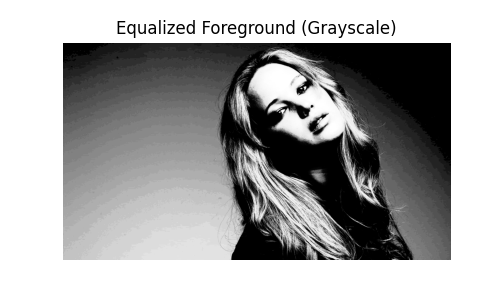

In [ ]:
plt.close()

M, N = foreground_gray.shape  # Image dimensions
L = 256 

# transformation function
t = np.array([(L-1)/(M*N)*cdf[k] for k in range(256)], dtype=np.uint8)
# Apply transformation to get equalized foreground
equalized_foreground_gray = t[foreground_gray]
equalized_foreground_bgr = cv2.cvtColor(equalized_foreground_gray, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(5, 3))
plt.imshow(equalized_foreground_gray, cmap='gray')
plt.title('Equalized Foreground (Grayscale)')
plt.axis('off')
plt.show()


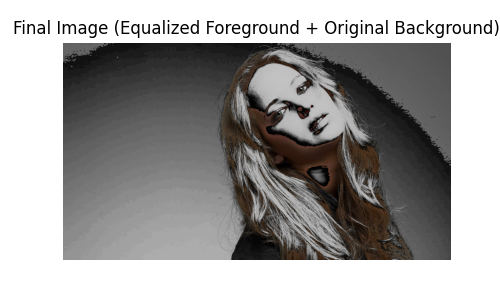

In [57]:
plt.close()
# Extract background (invert mask)
bg_mask = cv2.bitwise_not(fg_mask)
background = cv2.bitwise_and(img_6, img_6, mask=bg_mask)

# Combine equalized foreground with original background
final_image = cv2.add(background, equalized_foreground_bgr)

plt.figure(figsize=(5, 3))
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title('Final Image (Equalized Foreground + Original Background)')
plt.axis('off')
plt.show()


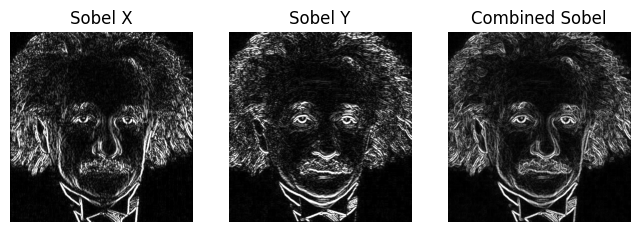

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


img = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)
sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],[ 0,  0,  0],[ 1,  2,  1]], dtype=np.float32)

grad_x = cv.filter2D(img, cv.CV_64F, sobel_x)
grad_y = cv.filter2D(img, cv.CV_64F, sobel_y)

grad_x = cv.convertScaleAbs(grad_x)
grad_y = cv.convertScaleAbs(grad_y)

sobel_combined = cv.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

# Show results
plt.figure(figsize=(8,4))
plt.subplot(131), plt.imshow(grad_x, cmap='gray'), plt.title('Sobel X'), plt.axis('off')
plt.subplot(132), plt.imshow(grad_y, cmap='gray'), plt.title('Sobel Y'), plt.axis('off')
plt.subplot(133), plt.imshow(sobel_combined, cmap='gray'), plt.title('Combined Sobel'), plt.axis('off')
plt.show()




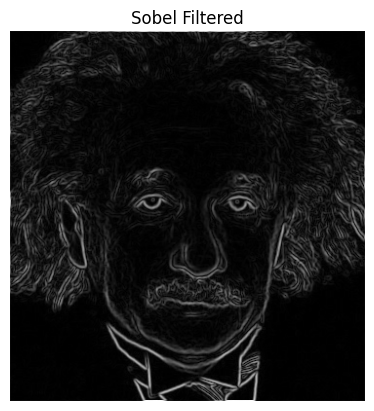

In [4]:
plt.close
def convolve2d(image, kernel):
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(image, dtype=float)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+k_h, j:j+k_w]
            output[i, j] = np.sum(region * kernel)

    return output

grad_x_manual = convolve2d(img, sobel_x)
grad_y_manual = convolve2d(img, sobel_y)
grad_mag_manual = np.sqrt(grad_x_manual**2 + grad_y_manual**2)
grad_mag_manual = np.uint8(255 * grad_mag_manual / np.max(grad_mag_manual))

# Display

plt.imshow(grad_mag_manual, cmap='gray')
plt.title("Sobel Filtered")
plt.axis('off')
plt.show()


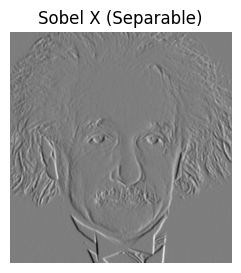

In [5]:

vertical = np.array([[1], [2], [1]], dtype=np.float32)  
horizontal = np.array([[1, 0, -1]], dtype=np.float32)   

# Apply separable convolution
tmp = cv.filter2D(img, cv.CV_64F, horizontal)  
sobel_sep_x = cv.filter2D(tmp, cv.CV_64F, vertical)     


plt.close()
plt.figure(figsize=(6, 3))
plt.imshow(sobel_sep_x, cmap='gray')
plt.title("Sobel X (Separable)")
plt.axis('off')
plt.show()


In [6]:
import numpy as np

def zoom_nearest(image, zoom_factor):
    h, w, c = image.shape
    new_h = int(h * zoom_factor)
    new_w = int(w * zoom_factor)
    
    zoomed = np.zeros((new_h, new_w, c), dtype=np.uint8)

    for y in range(new_h):
        for x in range(new_w):
            src_y = int(y / zoom_factor)
            src_x = int(x / zoom_factor)
            zoomed[y, x] = image[src_y, src_x]
    
    return zoomed


In [7]:
def zoom_bilinear(image, zoom_factor):
    h, w, c = image.shape
    new_h = int(h * zoom_factor)
    new_w = int(w * zoom_factor)

    zoomed = np.zeros((new_h, new_w, c), dtype=np.uint8)

    y_ratio = (h - 1) / new_h
    x_ratio = (w - 1) / new_w

    for y in range(new_h):
        for x in range(new_w):
            src_y = y * y_ratio
            src_x = x * x_ratio

            y0, x0 = int(src_y), int(src_x)
            y1, x1 = min(y0 + 1, h - 1), min(x0 + 1, w - 1)

            dy, dx = src_y - y0, src_x - x0

            top = (1 - dx) * image[y0, x0] + dx * image[y0, x1]
            bottom = (1 - dx) * image[y1, x0] + dx * image[y1, x1]

            zoomed[y, x] = (1 - dy) * top + dy * bottom

    return zoomed


Original image size: (270, 480, 3)
Nearest neighbor zoomed size: (810, 1440, 3)
Bilinear zoomed size: (810, 1440, 3)


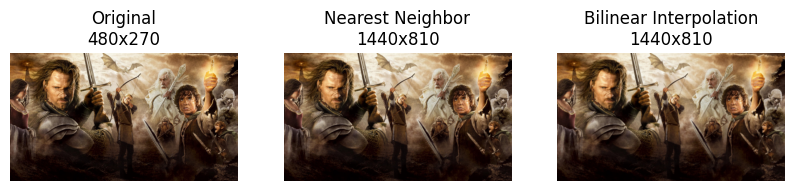

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt

# Assuming zoom_nearest and zoom_bilinear functions are defined somewhere

img = cv.imread('a1images/a1q5images/im01small.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

original_img = cv.imread('a1images/a1q5images/im01.png')

zoom_factor = 3

zoom_nn = zoom_nearest(img, zoom_factor)
zoom_bi = zoom_bilinear(img, zoom_factor)

# Print sizes of images
print(f"Original image size: {img.shape}")         # (height, width, channels)
print(f"Nearest neighbor zoomed size: {zoom_nn.shape}")
print(f"Bilinear zoomed size: {zoom_bi.shape}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title(f"Original\n{img.shape[1]}x{img.shape[0]}")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(zoom_nn)
plt.title(f"Nearest Neighbor\n{zoom_nn.shape[1]}x{zoom_nn.shape[0]}")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(zoom_bi)
plt.title(f"Bilinear Interpolation\n{zoom_bi.shape[1]}x{zoom_bi.shape[0]}")
plt.axis('off')

plt.show()


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt



img = cv.imread('a1images/a1q5images/im02small.png') #Can input different images
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

original_img = cv.imread('a1images/a1q5images/im02.png')#Zoomed original version of first image
original_img = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)

zoom_factor = 4

zoom_nn = zoom_nearest(img, zoom_factor)
zoom_bi = zoom_bilinear(img, zoom_factor)


print(f"Small image size: {img.shape}")         
print(f"Nearest neighbor zoomed size: {zoom_nn.shape}")
print(f"Bilinear zoomed size: {zoom_bi.shape}")
print(f"Original large image size: {original_img.shape}")


zoom_nn_f = zoom_nn.astype(np.float64)
zoom_bi_f = zoom_bi.astype(np.float64)
original_f = original_img.astype(np.float64)

# Calculate normalized SSD for nearest neighbor
ssd_nn = np.sum((zoom_nn_f - original_f) ** 2)
norm_ssd_nn = ssd_nn / np.sum(original_f ** 2)

# Calculate normalized SSD for bilinear
ssd_bi = np.sum((zoom_bi_f - original_f) ** 2)
norm_ssd_bi = ssd_bi / np.sum(original_f ** 2)

print(f"Normalized SSD (Nearest Neighbor): {norm_ssd_nn:.6f}")
print(f"Normalized SSD (Bilinear): {norm_ssd_bi:.6f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title(f"Small Image\n{img.shape[1]}x{img.shape[0]}")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(zoom_nn.astype(np.uint8))
plt.title(f"Nearest Neighbor\n{zoom_nn.shape[1]}x{zoom_nn.shape[0]}")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(zoom_bi.astype(np.uint8))
plt.title(f"Bilinear Interpolation\n{zoom_bi.shape[1]}x{zoom_bi.shape[0]}")
plt.axis('off')

plt.show()


Small image size: (365, 600, 3)
Nearest neighbor zoomed size: (1460, 2400, 3)
Bilinear zoomed size: (1460, 2400, 3)
Original large image size: (1459, 2400, 3)


ValueError: operands could not be broadcast together with shapes (1460,2400,3) (1459,2400,3) 

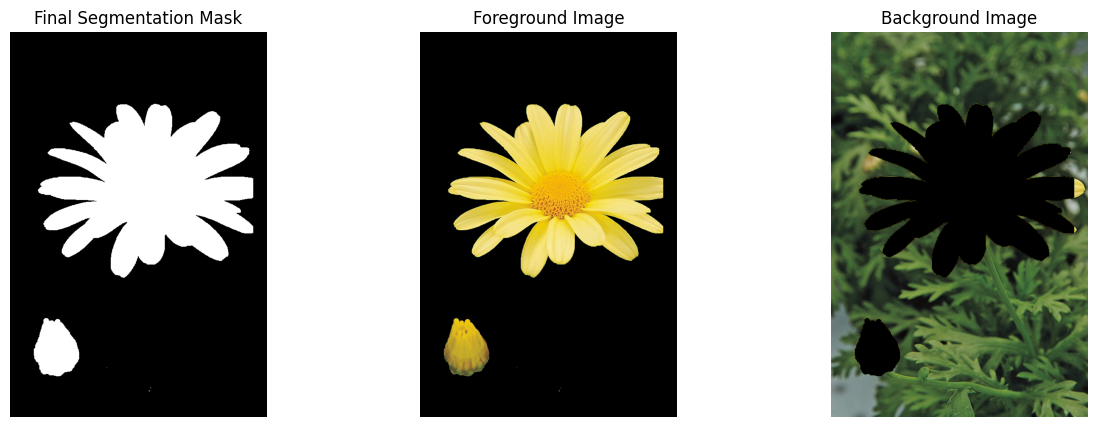

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


img = cv.imread('a1images/daisy.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

mask = np.zeros(img.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (30, 30, img.shape[1] - 60, img.shape[0] - 60)  

cv.grabCut(img_rgb, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

foreground = img_rgb * mask2[:, :, np.newaxis]
background = img_rgb * (1 - mask2)[:, :, np.newaxis]

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(mask2, cmap='gray')
plt.title('Final Segmentation Mask')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(foreground)
plt.title('Foreground Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(background)
plt.title('Background Image')
plt.axis('off')

plt.show()


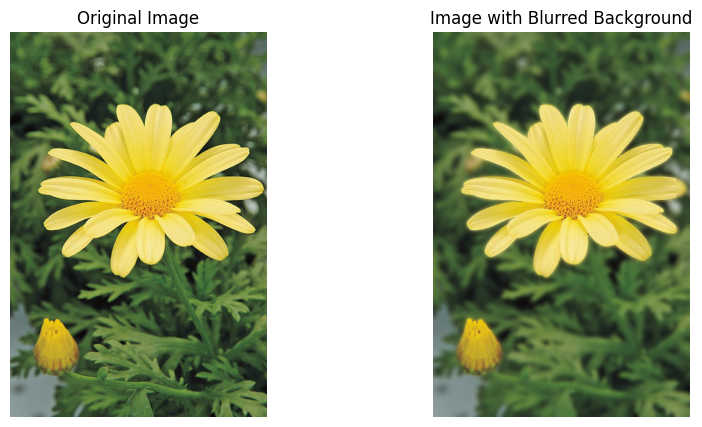

In [ ]:

blurred_background = cv.GaussianBlur(img_rgb, (25, 25), 0)
enhanced_img = blurred_background.copy()
enhanced_img[mask2 == 1] = img_rgb[mask2 == 1]


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_img)
plt.title('Image with Blurred Background')
plt.axis('off')

plt.show()
